<img src = "https://storage.googleapis.com/kaggle-forum-message-attachments/543450/13399/Untitled.jpg" width = "400"></img>

# Introduction

# <a id='0'>Content</a>

- <a href='#1'>1. Read the data</a>
- <a href='#2'>2. Data Understanding</a>
- <a href='#3'>3. Data Exploration</a>
 - <a href='#7'>3.1 Distribution of Y variable</a>
 - <a href='#8'>3.2 Distribution of X variables</a>
 - <a href='#9'>3.3 Correlation</a>
- <a href='#4'>4. Magic Feature</a>
- <a href='#5'>5. Model (LR)</a>
 - <a href='#10'>5.1 Model w/o Magic feature</a>
 - <a href='#11'>5.2 Model with Magic feature</a>
- <a href='#6'>6. Model (QDA)</a>

## <a id='1'>1. Read the data</a>

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import roc_auc_score

In [2]:
# Input path

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/instant-gratification/sample_submission.csv
/kaggle/input/instant-gratification/train.csv
/kaggle/input/instant-gratification/test.csv


In [3]:
train = pd.read_csv('/kaggle/input/instant-gratification/train.csv')
test  = pd.read_csv('/kaggle/input/instant-gratification/test.csv')

## <a id='2'>2. Data Understanding</a>

In [4]:
train.head()

,id,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,...,wheezy-myrtle-mandrill-entropy,wiggy-lilac-lemming-sorted,gloppy-cerise-snail-contributor,woozy-silver-havanese-gaussian,jumpy-thistle-discus-sorted,muggy-turquoise-donkey-important,blurry-buff-hyena-entropy,bluesy-chocolate-kudu-fepid,gamy-white-monster-expert,target
0,707b395ecdcbb4dc2eabea00e4d1b179,-2.070654,1.018160,0.228643,0.857221,0.052271,0.230303,-6.385090,0.439369,-0.721946,...,0.351895,0.618824,-1.542423,0.598175,0.611757,0.678772,0.247059,-0.806677,-0.193649,0
1,5880c03c6582a7b42248668e56b4bdec,-0.491702,0.082645,-0.011193,1.071266,-0.346347,-0.082209,0.110579,-0.382374,-0.229620,...,-0.645115,-1.246090,2.613357,-0.479664,1.581289,0.931258,0.151937,-0.766595,0.474351,0
2,4ccbcb3d13e5072ff1d9c61afe2c4f77,-1.680473,0.860529,-1.076195,0.740124,3.678445,0.288558,0.515875,0.920590,-1.223277,...,0.516422,0.130521,-0.459210,2.028205,-0.093968,-0.218274,-0.163136,-0.870289,0.064038,1
3,e350f17a357f12a1941f0837afb7eb8d,0.183774,0.919134,-0.946958,0.918492,0.862278,1.155287,0.911106,0.562598,-1.349685,...,-1.168967,1.385089,-0.353028,3.316150,-0.524087,-0.794327,3.936365,0.682989,-2.521211,0
4,a8f910ea6075b6376af079055965ff68,-0.203933,-0.177252,0.368074,-0.701320,-1.104391,0.735760,0.894273,-1.375826,-5.144946,...,-0.279168,1.544356,2.959727,1.641201,-0.130818,-0.264292,-0.748668,0.964218,0.087079,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262144 entries, 0 to 262143
Columns: 258 entries, id to target
dtypes: float64(255), int64(2), object(1)
memory usage: 516.0+ MB


In [6]:
train.describe()

,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,leaky-amaranth-lizard-sorted,...,wheezy-myrtle-mandrill-entropy,wiggy-lilac-lemming-sorted,gloppy-cerise-snail-contributor,woozy-silver-havanese-gaussian,jumpy-thistle-discus-sorted,muggy-turquoise-donkey-important,blurry-buff-hyena-entropy,bluesy-chocolate-kudu-fepid,gamy-white-monster-expert,target
count,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,...,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000
mean,0.005924,0.000936,-0.012530,-0.005688,0.001607,0.007878,-0.003500,-0.005927,0.002664,0.020485,...,-0.002670,-0.011401,0.007895,0.000651,-0.002613,0.002351,-0.011684,-0.007153,-0.004066,0.500225
std,1.706660,1.720943,1.698693,1.874875,1.726869,1.734646,1.720431,1.693276,1.872248,1.645070,...,1.799308,1.788832,1.775853,1.703296,1.692972,1.742284,1.698231,1.759408,1.661463,0.500001
min,-15.588429,-15.644144,-15.235982,-15.672966,-16.800626,-14.789422,-15.591329,-15.696478,-17.011807,-14.693510,...,-16.740804,-17.681945,-15.705197,-15.765274,-15.604682,-16.965775,-15.064518,-16.145154,-16.815640,0.000000
25%,-0.765404,-0.770224,-0.777421,-0.802502,-0.770838,-0.771608,-0.770634,-0.764398,-0.795475,-0.756594,...,-0.782944,-0.788437,-0.778580,-0.767367,-0.764199,-0.770457,-0.768885,-0.785702,-0.766552,0.000000
50%,0.002148,0.003543,-0.005771,-0.003505,0.000866,0.002830,0.001257,-0.003657,0.004936,0.004372,...,-0.002239,-0.004543,-0.000675,0.000771,-0.000331,-0.000617,-0.005634,-0.004459,-0.004471,1.000000
75%,0.769228,0.773400,0.764092,0.798460,0.769954,0.776606,0.769794,0.752836,0.800376,0.764807,...,0.786180,0.776178,0.788910,0.769277,0.764115,0.773100,0.753518,0.774197,0.758012,1.000000
max,15.797000,18.577178,17.205310,16.585173,16.815798,17.378922,15.202100,16.645394,19.396192,17.131375,...,15.511936,16.252503,16.387990,16.260286,14.748128,16.212146,18.866005,18.811832,17.302211,1.000000


## <a id='3'>3. Data Exploration</a>

### <a id='7'>3.1 Distribution of Y variable</a>

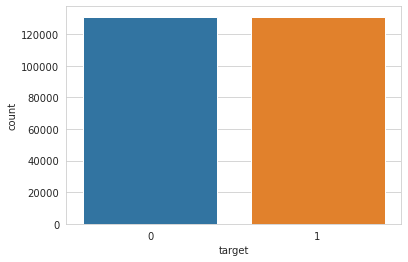

In [7]:
sns.countplot(train.target)

### Conclusion: 
Target variable seems to be equally distributed

### <a id='8'>3.2 Distribution of X variables</a>

In [8]:
def plot_feature_distplot(df, features):
    i = 0
    plt.figure()
    fig, ax = plt.subplots(4,4,figsize=(14,14))

    for feature in features:
        i += 1
        plt.subplot(4,4,i)
        sns.distplot(df[feature])
        plt.xlabel(feature, fontsize=9)
    plt.show();

<Figure size 432x288 with 0 Axes>

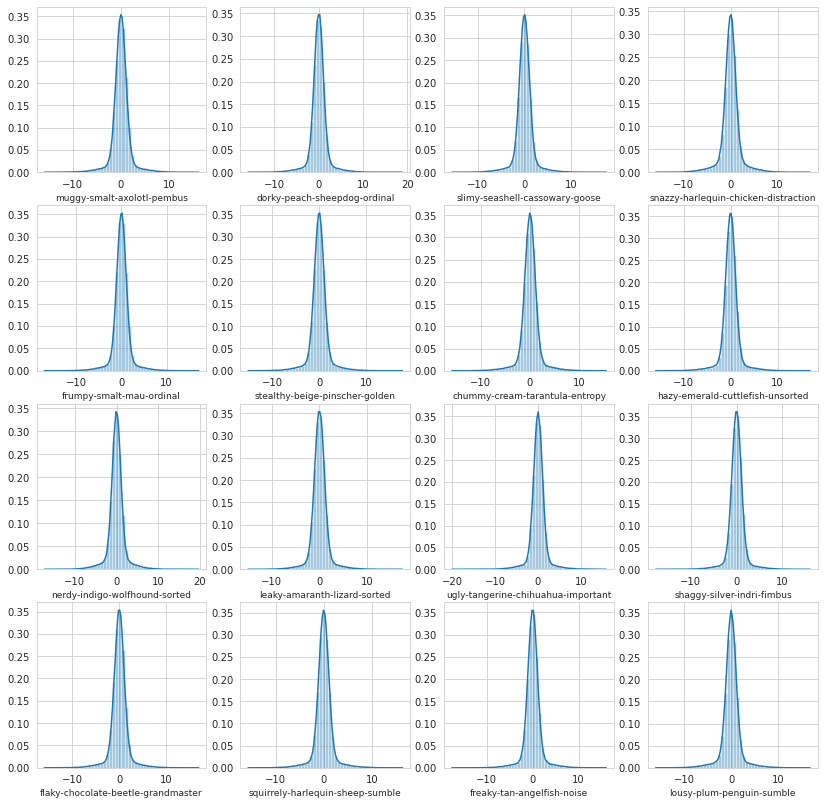

In [9]:
cols = [col for col in train.columns if col not in ["id", "target"]]

# distribution plot for first 16 variables
plot_feature_distplot(train, cols[0:16])

### Conclusion: 
All 'X' variables seems to be normally distributed.

### <a id='9'>3.3 Correlation</a>

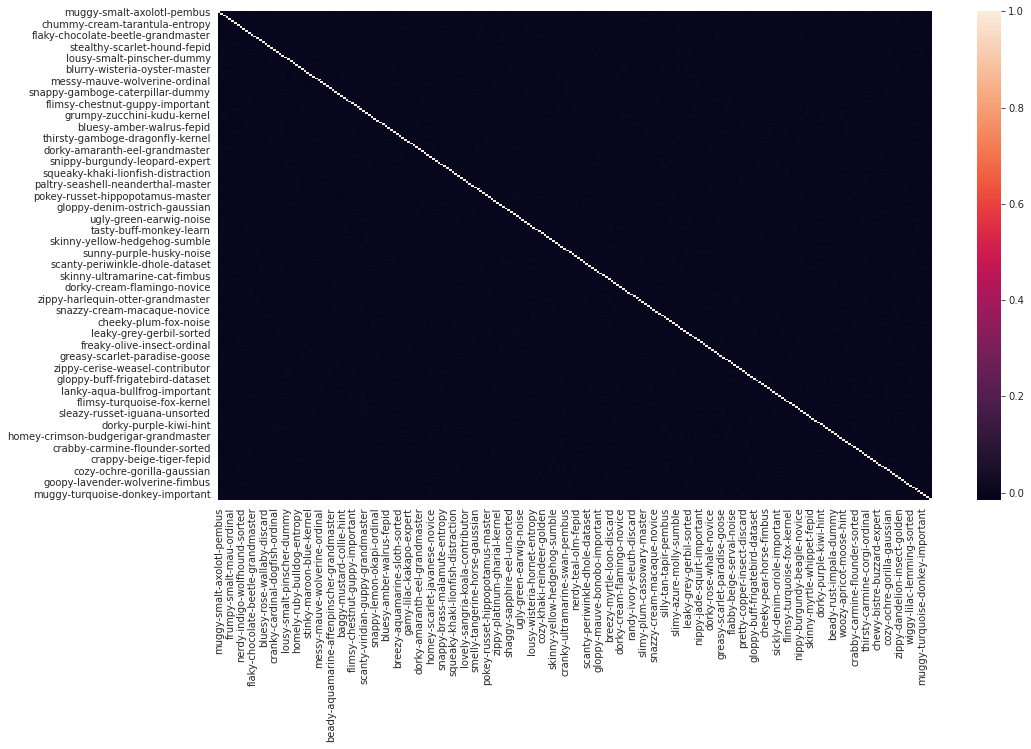

In [10]:
plt.figure(figsize=[16,9])
sns.heatmap(train[cols].corr())

### Conclusion: 
From heatmap, it seems to be there is no relation between 'X' variables.

## <a id='4'>4. Magic Feature</a>

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262144 entries, 0 to 262143
Columns: 258 entries, id to target
dtypes: float64(255), int64(2), object(1)
memory usage: 516.0+ MB


In [12]:
train.dtypes[train.dtypes == np.int64]

wheezy-copper-turtle-magic    int64
target                        int64
dtype: object

### There are two 'int' type columns in train dataset
1. wheezy-copper-turtle-magic
2. target

In [13]:
train['wheezy-copper-turtle-magic'].value_counts()

51     570
489    556
298    554
135    554
245    553
      ... 
277    476
215    475
108    472
42     471
185    442
Name: wheezy-copper-turtle-magic, Length: 512, dtype: int64

#### Column 'wheezy-copper-turtle-magic' can be treated as numeric or category.

### Here, we are gong to build the model by considering both options
1. Treat the column 'wheezy-copper-turtle-magic' as numeric
2. Treat the column 'wheezy-copper-turtle-magic' as category

In [14]:
train['wheezy-copper-turtle-magic'].nunique()

512

In [15]:
print('Train set')
print('Minimum value of wheezy-copper-turtle-magic:',train['wheezy-copper-turtle-magic'].min())
print('Maximum value of wheezy-copper-turtle-magic:',train['wheezy-copper-turtle-magic'].max())

Train set
Minimum value of wheezy-copper-turtle-magic: 0
Maximum value of wheezy-copper-turtle-magic: 511


## <a id='5'>5. Model (LR)</a>

### <a id='10'>5.1 Model w/o Magic Feature</a>

### Here, we consider the column 'wheezy-copper-turtle-magic' as numeric and build the model

In [16]:
cols = [c for c in train.columns if c not in ['id', 'target']]
oof = np.zeros(len(train))

# Stratified K-fold
skf = StratifiedKFold(n_splits=5)
 
for train_idx, val_idx in skf.split(train[cols], train['target']):
    
    # LR model
    clf = LogisticRegression()
    clf.fit(train.loc[train_idx][cols], train.loc[train_idx]['target'])
    oof[val_idx] = clf.predict_proba(train.loc[val_idx][cols])[:,1]

auc = roc_auc_score(train['target'],oof)
print('LR CV score w/o Magic feature =',round(auc,4))

LR CV score w/o Magic feature = 0.53


### <a id='11'>5.2 Model with Magic Feature</a>

### Here, we consider the column 'wheezy-copper-turtle-magic' as category and build 512 models for each value

In [17]:
cols = [c for c in train.columns if c not in ['id', 'target']]

cols.remove('wheezy-copper-turtle-magic')
oof = np.zeros(len(train))

# Build 512 models
for i in range(512):
    
    # train the data for each value of 'wheezy-copper-turtle-magic'
    train1 = train[train['wheezy-copper-turtle-magic']==i]     
    
    idx1 = train1.index
    train1.reset_index(drop = True, inplace = True)
    
    # Stratified K-fold
    skf = StratifiedKFold(n_splits = 5)     
    
    for train_idx, val_idx in skf.split(train1[cols], train1['target']):
        
        # LR model 
        clf = LogisticRegression(solver = 'liblinear', penalty = 'l1', C = 0.05)
        clf.fit(train1.loc[train_idx][cols], train1.loc[train_idx]['target'])
        oof[idx1[val_idx]] = clf.predict_proba(train1.loc[val_idx][cols])[:,1]
    
auc = roc_auc_score(train['target'],oof)       

In [18]:
print('LR CV score with Magic feature =',round(auc,4)) 

LR CV score with Magic feature = 0.7998


### Conclusion: 
We can see huge difference in the CV score with Magic feature
1. LR, CV score without Magic feature: 0.53
2. LR, CV score with Magic feature:    0.79

## <a id='6'>6. Model (QDA)</a>

In [19]:
cols = [c for c in train.columns if c not in ['id', 'target']]

cols.remove('wheezy-copper-turtle-magic')
oof = np.zeros(len(train))

# Build 512 models
for i in range(512):
    
    # train the data for each value of 'wheezy-copper-turtle-magic'
    train1 = train[train['wheezy-copper-turtle-magic']==i]     
    
    idx1 = train1.index
    train1.reset_index(drop = True, inplace = True)
    
    # Dropping low-variance features (fit and transform)
    sel = VarianceThreshold(threshold = 1.5).fit(train1[cols])
    train2 = sel.transform(train1[cols])
    
    # Stratified K-fold
    skf = StratifiedKFold(n_splits = 5)     
    
    for train_idx, val_idx in skf.split(train2, train1['target']):
        
        # QDA model 
        clf = QuadraticDiscriminantAnalysis(reg_param=0.5)
        clf.fit(train2[train_idx,:], train1.loc[train_idx]['target'])
        oof[idx1[val_idx]] = clf.predict_proba(train2[val_idx,:])[:,1]
    
auc = roc_auc_score(train['target'],oof)  

In [20]:
print('QDA, CV score =',round(auc,4))

QDA, CV score = 0.9633


### Summary

QDA outperforms LR and other models as well.

The dataset most likely was produced by sklearn.datasets make_classification. This method generates clusters of gaussians with non-diagonal covariance matrix and assigns them classes. QDA works exactly with this structure of data, it learns normal distributions with n-dimentional covariance matrix.

QDA works by finding the multivariate Gaussian distribution of target=1 and finding the multivariate Gaussian distribution of target=0. A multivariate Gaussian distribution is an hyper-ellipsoid in p dimensional space where p is the number of variables.

For more information, please refer:
https://www.kaggle.com/c/instant-gratification/discussion/93843